In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
figsiz_=(11,2.5*2)
fontsiz = 18


plt.rc('figure', figsize=figsiz_,dpi=100)
plt.rcParams['figure.figsize'] = figsiz_
plt.rc('font', family='serif', size=fontsiz)

In [31]:
import numpy as np
import math
# f1 = lambda x: 5.5*torch.sin(x*2*math.pi*5.1)
# f2 = lambda x: 5.0*torch.sin(x*2*math.pi*2.1)
# f3 = lambda x: 5.5*torch.sin(x*2*math.pi*4.1)

f1 = lambda x: 2.0*torch.sin(x*2*math.pi*5.1)
f2 = lambda x: 3.0*torch.sin(x*2*math.pi*2.1)
#f2 = lambda x: 3.0*torch.sin(x*2*math.pi*2.1) - 2.0*torch.sin(x*2*math.pi*8.1)**2

f3 = lambda x: 4.0*torch.sin(x*2*math.pi*4.1)

f= [f1,f2,f3]


nfull,nsub,nsub2=200,10,30
#nfull,nsub,nsub2=200,15,30

#nfull,nsub=100,50
#nchannels = 2
nchannels = 3

x_lb,x_ub=0,4

# idx=np.sort(np.random.randint(nfull, size=(nchannels, nsub)),axis=1)
# idx2=np.sort(np.random.randint(nfull, size=(nchannels, nsub2)),axis=1)

#ratio=0.6
ratio=0.7
#ratio=0.8

#idx=np.sort(np.random.randint(int(nfull*0.66), size=(nchannels, nsub)),axis=1)
idx11=np.sort(np.random.randint(int(nfull*ratio), size=(1, nsub)),axis=1)
idx12=np.sort(np.random.randint(int(nfull*ratio), size=(1, nsub)),axis=1) + int(nfull*(1-ratio))
idx13=np.sort(np.random.randint(int(nfull), size=(1, nsub)),axis=1) 

if nchannels == 2:
    idx=np.concatenate([idx11,idx12],axis=0)
elif nchannels == 3:
    idx=np.concatenate([idx11,idx12,idx13],axis=0)
else:
    pass
idx2=np.sort(np.random.randint(nfull, size=(nchannels, nsub2)),axis=1)


x_c = torch.cat([(torch.linspace(x_lb,x_ub,nfull)[idx[j]])[None,:] for j in range(nchannels)],dim=0)
x_t = torch.cat([(torch.linspace(x_lb,x_ub,nfull)[idx2[j]])[None,:] for j in range(nchannels)],dim=0)
y_c = torch.cat([f[j](x_c[j])[None,:] for j in range(nchannels)],dim=0)
y_t = torch.cat([f[j](x_t[j])[None,:] for j in range(nchannels)],dim=0)


x_f = torch.cat([torch.linspace(x_lb,x_ub,nfull)[None,:] for j in range(nchannels)],dim=0)
y_f = torch.cat([f[j](x_f[j])[None,:] for j in range(nchannels)],dim=0)


x_c=x_c.T.unsqueeze(dim=0)
y_c=y_c.T.unsqueeze(dim=0)
x_t=x_t.T.unsqueeze(dim=0)
y_t=y_t.T.unsqueeze(dim=0)
x_f=x_f.T.unsqueeze(dim=0)
y_f=y_f.T.unsqueeze(dim=0)

nb=3
xc=x_c.repeat(nb,1,1).unsqueeze(dim=-2)
yc=y_c.repeat(nb,1,1)
xt=x_t.repeat(nb,1,1).unsqueeze(dim=-2)
yt=y_t.repeat(nb,1,1)

xf=x_f.repeat(nb,1,1).unsqueeze(dim=-2)
yf=y_f.repeat(nb,1,1)


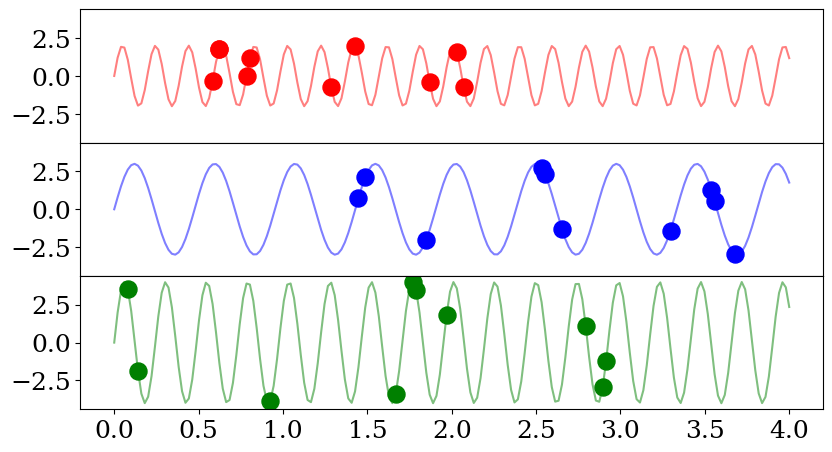

In [32]:
# import matplotlib.pyplot as plt
# figsiz_=(20,2.5*3)
# #delta=
#ylim_ = [-5-delta,5+delta]

#xlim_ = [0-delta,10+delta]
delta_x = 0.1
delta_y = 0.1
y_=5
xlim_ = [x_lb-delta_x,x_ub+delta_x]
ylim_ = [-y_-delta_y,y_+delta_y]
color_list = ['r','b','g']
xtick_ = list(np.arange(x_ub+1.))
ytick_ = [-(y_-1),0,(y_-1)]









fig, (ax1, ax2 ,ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax3.scatter(xc[0,:,0,2].cpu().data.numpy(),yc[0,:,2].cpu().data.numpy(),color=color_list[2],marker='o',s=150)

ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
ax3.plot(xf[0,:,0,2].cpu().data.numpy(),yf[0,:,2].cpu().data.numpy(),color_list[2]+'-',markersize=10,label='ch 3',alpha=0.5)

plt.show()

In [33]:

# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
# plt.show()

In [34]:
#xf.shape,yf.shape,xc.shape,yc.shape

In [35]:
from test_baseline import Convcnp,compute_loss_baseline
from test_kernels import SM_kernel
from test_gpsampler import Independent_GPsampler,Multioutput_GPsampler,Multioutput_GPsampler_V2
from test_gpsampler import Independent_GPsampler_Proxi,Multioutput_GPsampler_Proxi

In [67]:
#num_channels = 3
cnntype='deep'
#cnntype='shallow'

num_channels = nchannels
in_dims,out_dims = 1,1
multiplier = 2**6 if cnntype=='deep' else 2**3
#num_fourierbasis = 20
num_fourierbasis = 100

#init_lscale=1.
#init_lscale=1.
#init_lscale=.5
#init_lscale=.25
#init_lscale=1.

#init_lscale=1.
#init_lscale = 1.
init_lscale=1.2

#kernel = SM_kernel(in_dims=in_dims,num_channels=num_channels,scales=1.,loglik_err=0.1)
kernel = SM_kernel(in_dims=in_dims,num_channels=num_channels,scales=init_lscale,loglik_err=0.1)
i_gpsampler = Independent_GPsampler(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)
iproxi_gpsampler = Independent_GPsampler(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)

m_gpsampler = Multioutput_GPsampler(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)
#m_gpsampler = Multioutput_GPsampler_V2(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)

mproxi_gpsampler = Multioutput_GPsampler_Proxi(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = num_fourierbasis,num_sampleposterior=5,multiplier = multiplier)



init_lscale0=.05
#init_lscale0=init_lscale
convcnp = Convcnp(in_dims=1,out_dims=1,num_channels=num_channels,init_lengthscale=init_lscale0,cnntype=cnntype)



In [68]:
#regloss


In [69]:
import matplotlib.pyplot as plt
#figsiz_=(8,2.5*2)
delta_x=1.0
delta_y=0.2
ylim_ = [-6-delta_y,6+delta_y]
xlim_ = [x_lb-delta_x,x_ub+delta_x]

xtick_ = list(np.arange(x_ub))

In [70]:
fig_pdf = '.pdf'
savepath = './'


## multiouput indepdent sampling

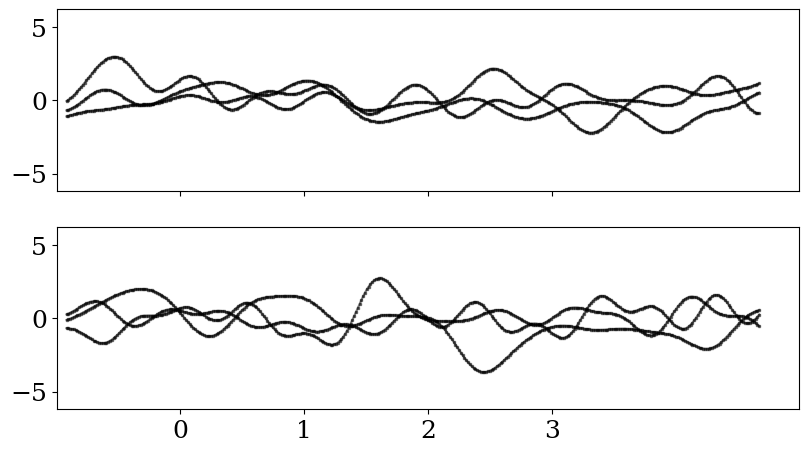

In [71]:
numsamples=3
xa_samples,prior_samples = i_gpsampler.sample_prior_shared(xc,xc,numsamples=numsamples,reorder=False)

#    plt.ylim(ylim_)
# plt.figure(figsize=figsiz_)
# color_list = ['r','b','g']
# for i in range(nchannels):
#     plt.subplot(3,1,i+1)
#     for j in range(numsamples):
#         plt.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,i].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
#     plt.xlim(xlim_)
#     plt.ylim(ylim_)
# plt.show()


#plt.figure()
#fig, (ax1, ax2) = plt.subplots(figsize=figsiz_,nrows=2, sharex=True, sharey=True)
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

#for i in range(nchannels):
for j in range(numsamples):
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,0].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
    ax1.set(xlim=xlim_,ylim=ylim_)
    #ax1.set_ylim(ylim_)
    
    
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,1].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
    ax2.set(xlim=xlim_,ylim=ylim_)
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
plt.show()
#plt.savefig('tmp' + fig_pdf, dpi=1000,bbox_inches='tight')









# for i in range(nchannels):
#     plt.subplot(3,1,i+1)
#     for j in range(numsamples):
#         plt.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,i].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
#     plt.xlim(xlim_)
#     plt.ylim(ylim_)
# plt.show()


## multiouput corrleated sampling

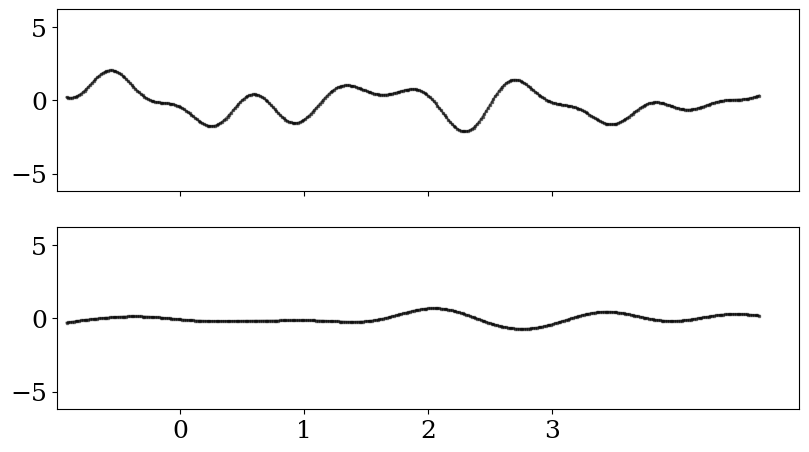

In [72]:
#prior_samples.size()
numsamples=1
xa_samples,prior_samples = m_gpsampler.sample_prior_shared(xc,xc,numsamples=numsamples,reorder=False)

# #    plt.ylim(ylim_)
# plt.figure(figsize=figsiz_)
# color_list = ['r','b','g']
# for i in range(nchannels):
#     plt.subplot(3,1,i+1)
#     for j in range(numsamples):
#         plt.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,i].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
#     plt.xlim(xlim_)
#     plt.ylim(ylim_)
# plt.show()


fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

#for i in range(nchannels):
for j in range(numsamples):
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,0].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
    ax1.set(xlim=xlim_,ylim=ylim_)
    #ax1.set_ylim(ylim_)
    
    
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,1].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
    ax2.set(xlim=xlim_,ylim=ylim_)
    
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
# ax1.legend(loc='lower left',fontsize=fontsiz)
# ax2.legend(loc='lower left',fontsize=fontsiz)
plt.show()


#plt.savefig('tmp2' + fig_pdf, dpi=1000,bbox_inches='tight')


In [73]:
prior_samples.shape

torch.Size([3, 1, 384, 9])

## model configurations

In [74]:
# import matplotlib.pyplot as plt
# figsiz_=(20,2.5*3)
# #delta=
#ylim_ = [-5-delta,5+delta]

#xlim_ = [0-delta,10+delta]
delta_x = 0.1
delta_y = 0.1
y_=5
xlim_ = [x_lb-delta_x,x_ub+delta_x]
ylim_ = [-y_-delta_y,y_+delta_y]
color_list = ['r','b','g']
xtick_ = list(np.arange(x_ub+1.))
ytick_ = [-(y_-1),0,(y_-1)]

In [75]:
#xa_samples[0]-xgrid[0]

In [76]:
#xa_samples.size(),xgrid.size()

## convcnp + functional features

'./fig_base_nsamples1_initl1.2'

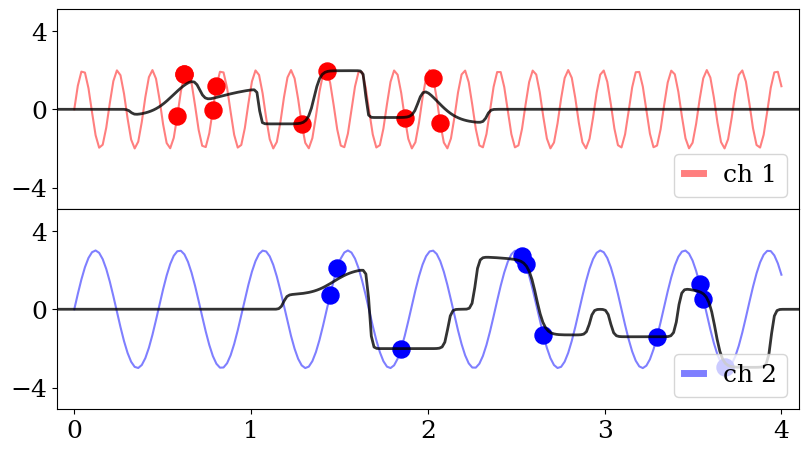

In [77]:

xgrid = convcnp.compute_xgrid(xc.squeeze(),yc,xt.squeeze())
_,nh1,h1,h0 = convcnp.encoder(xc.squeeze(),yc,xgrid.squeeze())


fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

#for j in range(numsamples):
    #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
    #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
ax1.plot(xgrid[0,:,0].cpu().data.numpy(),nh1[0,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
ax2.plot(xgrid[0,:,1].cpu().data.numpy(),nh1[0,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
ax1.set_yticks(ytick_)
ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     

    
# plt.xlim(xlim_)
# plt.ylim(ylim_)

savefigname = savepath + 'fig_base_nsamples{}_initl{}'.format(1,init_lscale)
#plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
savefigname














## independent gp and depedent + get posterior

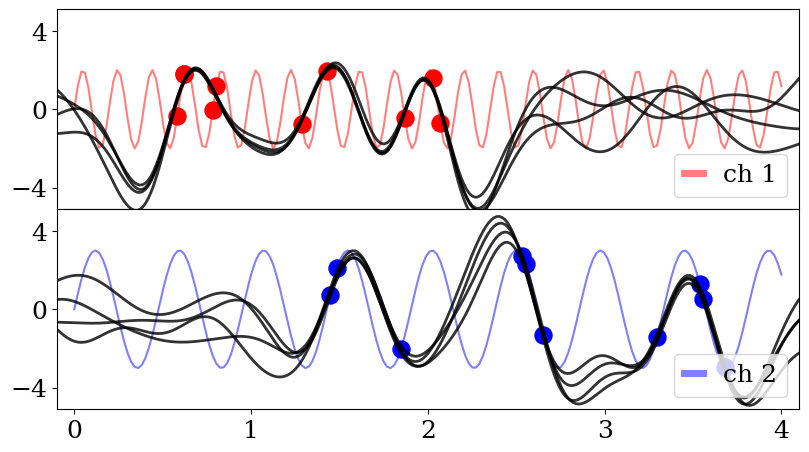



./fig_gpindsampler_nsamples4_initl1.2.pdf
regloss: 13.100188255310059





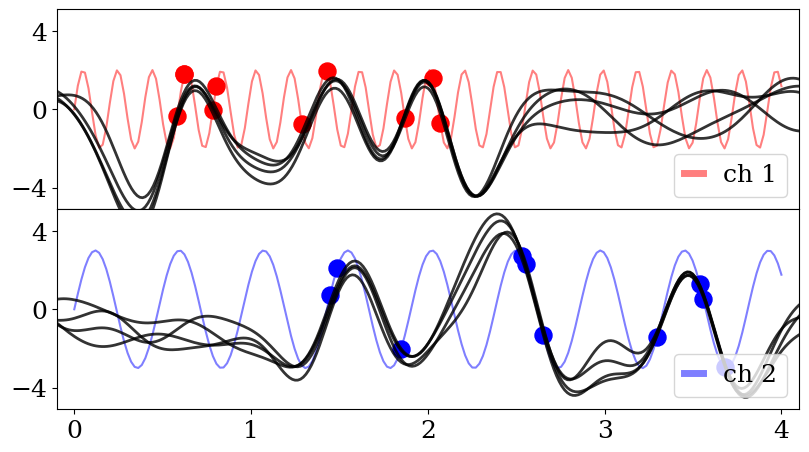



./fig_gpdepsampler_nsamples4_initl1.2.pdf
regloss: 12.911067008972168


In [84]:




numsamples=4
#xa_samples,posterior_samples,prior_samp10les = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
xa_samples,posterior_samples,density,prior_yc = i_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

for j in range(numsamples):
    #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
    #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      


    #prior yc    
    #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
    #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
        
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
ax1.set_yticks(ytick_)
ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     

    
# plt.xlim(xlim_)
# plt.ylim(ylim_)

savefigname = savepath + 'fig_gpindsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
#plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
plt.show()


print('\n')
print(savefigname + fig_pdf)
print('regloss: {}'.format(i_gpsampler.regloss.item()))
print('\n'*2)











#-------------------------------
xa_samples,posterior_samples,density,prior_yc = m_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)


fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

for j in range(numsamples):
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    #prior yc
    #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
    #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
ax1.set_yticks(ytick_)
ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     

    
# # plt.xlim(xlim_)
# # plt.ylim(ylim_)
# savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# savefigname


savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
#plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
plt.show()


print('\n')
print(savefigname + fig_pdf)
print('regloss: {}'.format(m_gpsampler.regloss.item()))








In [79]:
# #i_gpsampler.kernel.prepare_cross_params()
# i_gpsampler.kernel.prepare_cross_params()
#m_gpsampler.kernel.prepare_cross_params()

In [80]:
m_gpsampler.kernel.prepare_cross_params()

(tensor([[1.4172e-06, 1.2676e-06, 1.3408e-06, 1.2676e-06, 1.1181e-06, 1.1912e-06,
          1.3408e-06, 1.1912e-06, 1.2644e-06]], grad_fn=<ReshapeAliasBackward0>),
 tensor([[0.8333, 0.4167, 0.4167, 0.4167, 0.8333, 0.4167, 0.4167, 0.4167, 0.8333]],
        grad_fn=<MulBackward0>),
 tensor([[1.0000, 0.1173, 0.1173, 0.1173, 1.0000, 0.1173, 0.1173, 0.1173, 1.0000]],
        grad_fn=<ReshapeAliasBackward0>))

In [81]:
i_gpsampler.kernel.prepare_cross_params()

(tensor([[1.4172e-06, 1.2676e-06, 1.3408e-06, 1.2676e-06, 1.1181e-06, 1.1912e-06,
          1.3408e-06, 1.1912e-06, 1.2644e-06]], grad_fn=<ReshapeAliasBackward0>),
 tensor([[0.8333, 0.4167, 0.4167, 0.4167, 0.8333, 0.4167, 0.4167, 0.4167, 0.8333]],
        grad_fn=<MulBackward0>),
 tensor([[1.0000, 0.1173, 0.1173, 0.1173, 1.0000, 0.1173, 0.1173, 0.1173, 1.0000]],
        grad_fn=<ReshapeAliasBackward0>))

In [82]:
m_gpsampler.kernel.logweight.exp()

tensor([1.0000, 1.0000, 1.0000], grad_fn=<ExpBackward0>)

In [83]:
#m_gpsampler.kernel.logweight.exp()

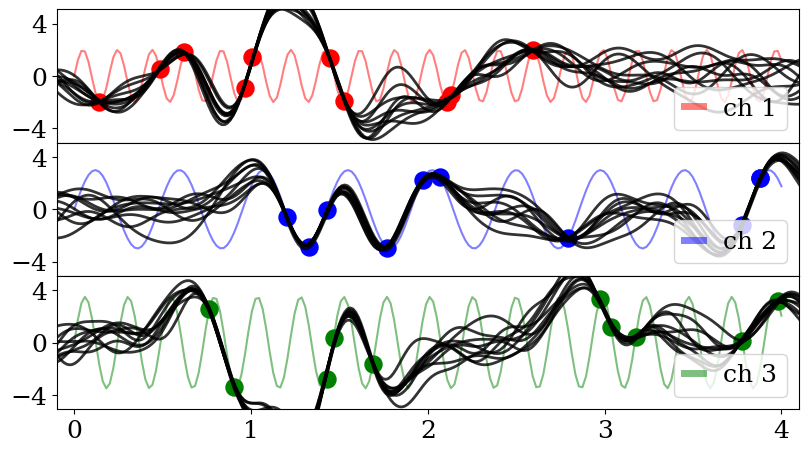

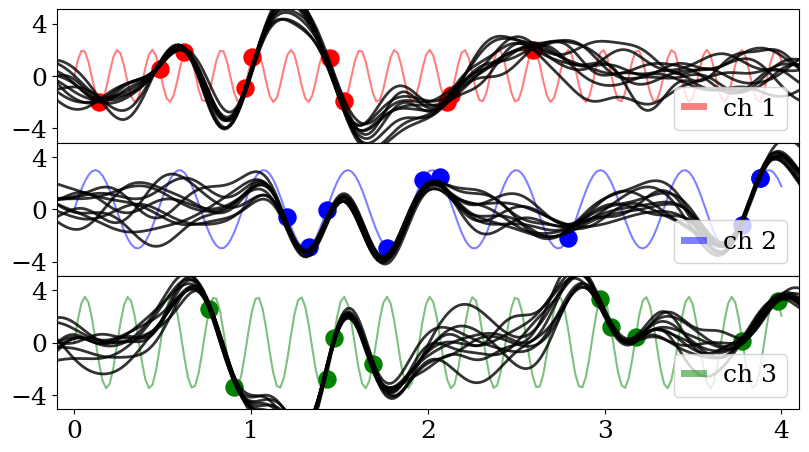

In [25]:
#numsamples=3
#xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
xa_samples,posterior_samples,density,prior_yc = i_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax3.scatter(xc[0,:,0,2].cpu().data.numpy(),yc[0,:,2].cpu().data.numpy(),color=color_list[2],marker='o',s=150)

ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
ax3.plot(xf[0,:,0,2].cpu().data.numpy(),yf[0,:,2].cpu().data.numpy(),color_list[2]+'-',markersize=10,label='ch 3',alpha=0.5)

for j in range(numsamples):
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax3.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,2].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    #prior yc
    #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
    #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
ax1.set_yticks(ytick_)
ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg3= ax3.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     
for line in leg3.get_lines():
    line.set_linewidth(5) 

savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
#plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')

savefigname + fig_pdf
plt.show()










#numsamples=3
#xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
xa_samples,posterior_samples,density,prior_yc = m_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
ax3.scatter(xc[0,:,0,2].cpu().data.numpy(),yc[0,:,2].cpu().data.numpy(),color=color_list[2],marker='o',s=150)

ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
ax3.plot(xf[0,:,0,2].cpu().data.numpy(),yf[0,:,2].cpu().data.numpy(),color_list[2]+'-',markersize=10,label='ch 3',alpha=0.5)

for j in range(numsamples):
    ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
    ax3.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,2].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    #prior yc
    #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
    #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
ax1.set(xlim=xlim_,ylim=ylim_)
ax2.set(xlim=xlim_,ylim=ylim_)
ax1.set_xticks(xtick_)
ax2.set_xticks(xtick_)
ax1.set_yticks(ytick_)
ax2.set_yticks(ytick_)

leg_pos = 'lower right'
leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
leg3= ax3.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

for line in leg1.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)
for line in leg2.get_lines():
    line.set_linewidth(5) 
    #line.set_markersize(4)     
for line in leg3.get_lines():
    line.set_linewidth(5) 

savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
#plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')

savefigname + fig_pdf
plt.show()




In [26]:
#prior_yc[0,j,:,0].shape,xc.shape

## independent gp and depedent + get posterior proxi

In [27]:

# numsamples=4

# #numsamples=3
# #xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# xa_samples,posterior_samples,density,prior_yc  = iproxi_gpsampler.sample_posterior(xc,yc,xc,numsamples=numsamples,reorder=False)
# #xa_samples,posterior_samples,density = mproxi_gpsampler.sample_posterior_proxi(xc,yc,xc,numsamples=numsamples,reorder=False)



# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

# for j in range(numsamples):
#     #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # # plt.xlim(xlim_)
# # # plt.ylim(ylim_)
# # savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# # plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# # savefigname


# savefigname = savepath + 'fig_gpindsamplerproxi_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# plt.show()


# print('\n')
# print(savefigname + fig_pdf)
# print('regloss: {}'.format(iproxi_gpsampler.regloss.item()))














# #numsamples=3
# #xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# xa_samples,posterior_samples,density,prior_yc  = mproxi_gpsampler.sample_posterior(xc,yc,xc,numsamples=numsamples,reorder=False)
# #xa_samples,posterior_samples,density = mproxi_gpsampler.sample_posterior_proxi(xc,yc,xc,numsamples=numsamples,reorder=False)
# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

# for j in range(numsamples):
#     #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # # plt.xlim(xlim_)
# # # plt.ylim(ylim_)
# # savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# # plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# # savefigname


# savefigname = savepath + 'fig_gpdepsamplerproxi_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')

# plt.show()


# print('\n')
# print(savefigname + fig_pdf)
# print('regloss: {}'.format(mproxi_gpsampler.regloss.item()))










In [28]:
mproxi_gpsampler.kernel.logweight.exp()

tensor([1.0000, 1.0000, 1.0000], grad_fn=<ExpBackward0>)

In [29]:
# #numsamples=3
# #xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# xa_samples,posterior_samples,density,prior_yc  = mproxi_gpsampler.sample_posterior(xc,yc,xc,numsamples=numsamples,reorder=False)
# #xa_samples,posterior_samples,density = mproxi_gpsampler.sample_posterior_proxi(xc,yc,xc,numsamples=numsamples,reorder=False)



# # #figsiz_=(20,2*3)
# # plt.figure(figsize=figsiz_)
# # color_list = ['r','b','g']
# # for i in range(nchannels):
# #     plt.subplot(3,1,i+1)
# #     plt.plot(xc[0,:,0,i].cpu().data.numpy(),yc[0,:,i].cpu().data.numpy(),color_list[i]+'o-',markersize=10)
# #     #plt.plot(xt[0,:,0,i].cpu().data.numpy(),yt[0,:,i].cpu().data.numpy(),color_list[i]+'s',markersize=10)
    
# #     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples)[0,:,i].cpu().data.numpy(),'k'+'d',alpha=0.2)        
# #     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples+update_term)[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8)    
    
# #     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.5)    
# #     #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8,markersize=5)
# #     for j in range(numsamples):
# #         #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=5)
# #         plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)   
# #     plt.xlim(xlim_)
# #     plt.ylim(ylim_)
    
# #     plt.yticks(ylim_)    
# #     #plt.xticks(np.arange(20)*0.5)
# # plt.show()





# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)

# for j in range(numsamples):
#     #ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     #ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)      
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

    
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     

    
# # # plt.xlim(xlim_)
# # # plt.ylim(ylim_)
# # savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# # plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# # savefigname


# savefigname = savepath + 'fig_gpdepsamplerproxi_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')

# plt.show()


# print('\n')
# print(savefigname + fig_pdf)
# print('regloss: {}'.format(mproxi_gpsampler.regloss.item()))





In [30]:
# #numsamples=3
# #xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
# xa_samples,posterior_samples,density,prior_yc = mproxi_gpsampler.sample_posterior(xc,yc,xc,numsamples=numsamples,reorder=False)



# # #figsiz_=(20,2*3)
# # plt.figure(figsize=figsiz_)
# # color_list = ['r','b','g']
# # for i in range(nchannels):
# #     plt.subplot(3,1,i+1)
# #     plt.plot(xc[0,:,0,i].cpu().data.numpy(),yc[0,:,i].cpu().data.numpy(),color_list[i]+'o-',markersize=10)
# #     #plt.plot(xt[0,:,0,i].cpu().data.numpy(),yt[0,:,i].cpu().data.numpy(),color_list[i]+'s',markersize=10)
    
# #     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples)[0,:,i].cpu().data.numpy(),'k'+'d',alpha=0.2)        
# #     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples+update_term)[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8)    
    
# #     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.5)    
# #     #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8,markersize=5)
# #     for j in range(numsamples):
# #         #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=5)
# #         plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)   
# #     plt.xlim(xlim_)
# #     plt.ylim(ylim_)
    
# #     plt.yticks(ylim_)    
# #     #plt.xticks(np.arange(20)*0.5)
# # plt.show()





# fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=True)
# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.00)
# # ax1.plot(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color_list[0]+'o-',markersize=10,label='ch 1')
# # ax2.plot(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color_list[1]+'o-',markersize=10,label='ch 2')

# ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),yc[0,:,0].cpu().data.numpy(),color=color_list[0],marker='o',s=150)
# ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),yc[0,:,1].cpu().data.numpy(),color=color_list[1],marker='o',s=150)
# ax3.scatter(xc[0,:,0,2].cpu().data.numpy(),yc[0,:,2].cpu().data.numpy(),color=color_list[2],marker='o',s=150)

# ax1.plot(xf[0,:,0,0].cpu().data.numpy(),yf[0,:,0].cpu().data.numpy(),color_list[0]+'-',markersize=10,label='ch 1',alpha=0.5)
# ax2.plot(xf[0,:,0,1].cpu().data.numpy(),yf[0,:,1].cpu().data.numpy(),color_list[1]+'-',markersize=10,label='ch 2',alpha=0.5)
# ax3.plot(xf[0,:,0,2].cpu().data.numpy(),yf[0,:,2].cpu().data.numpy(),color_list[2]+'-',markersize=10,label='ch 3',alpha=0.5)

# for j in range(numsamples):
#     ax1.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,0].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax2.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,1].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      
#     ax3.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,2].cpu().data.numpy(),'k-',alpha=0.8,linewidth=2)      

#     #prior yc
#     #ax1.scatter(xc[0,:,0,0].cpu().data.numpy(),prior_yc[0,j,:,0].cpu().data.numpy(),s=50,color='k',marker='o')      
#     #ax2.scatter(xc[0,:,0,1].cpu().data.numpy(),prior_yc[0,j,:,1].cpu().data.numpy(),s=50,color='k',marker='o')      
    
    
    
# ax1.set(xlim=xlim_,ylim=ylim_)
# ax2.set(xlim=xlim_,ylim=ylim_)
# ax1.set_xticks(xtick_)
# ax2.set_xticks(xtick_)
# ax1.set_yticks(ytick_)
# ax2.set_yticks(ytick_)

# leg_pos = 'lower right'
# leg1= ax1.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg2= ax2.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)
# leg3= ax3.legend(loc=leg_pos ,fontsize=fontsiz,handlelength=.75,ncol=1)

# for line in leg1.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)
# for line in leg2.get_lines():
#     line.set_linewidth(5) 
#     #line.set_markersize(4)     
# for line in leg3.get_lines():
#     line.set_linewidth(5) 

    
# # # plt.xlim(xlim_)
# # # plt.ylim(ylim_)
# # savefigname = savepath + 'gpindsampler_nsamples{}'.format(numsamples)
# # plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')
# # savefigname


# savefigname = savepath + 'fig_gpdepsampler_nsamples{}_initl{}'.format(numsamples,init_lscale)
# #plt.savefig(savefigname + fig_pdf, dpi=1000,bbox_inches='tight')

# savefigname + fig_pdf



